In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as pl


# Import the random forest package
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.decomposition import PCA
from sklearn import svm

import sklearn

In [2]:
def visualize_classes(total_data, response):
    ''' Visualization of total spam data
    :param total_data: Train and test data
    :param response: answers
    :return:
    '''
    pca = PCA(n_components=2)
    projection = pca.fit_transform(total_data)

    not_spam_class = np.where(response == 0)
    spam_class = np.where(response == 1)

    fig = pl.figure(figsize=(8, 8))
    pl.rcParams['legend.fontsize'] = 10

    pl.plot(projection[not_spam_class, 0], projection[not_spam_class, 1],
            'o', markersize=7, color='blue', alpha=0.5, label='Not spam')

    pl.plot(projection[spam_class, 0], projection[spam_class, 1],
            'o', markersize=7, color='red', alpha=0.5, label='Spam')

    pl.title('Spam data')
    pl.show()


def visualize_data(total_data, train_size, test_size):
    ''' Visualization of total spam data
    :param total_data: Train and test data
    :param train_size: Size of train set
    :param test_size: Size of test set
    :return:
    '''
    pca = PCA(n_components=2)
    projection = pca.fit_transform(total_data)

    fig = pl.figure(figsize=(8, 8))

    pl.rcParams['legend.fontsize'] = 10
    pl.plot(projection[0:train_size, 0], projection[0:train_size, 1],
            'o', markersize=7, color='blue', alpha=0.5, label='Train')
    pl.plot(projection[train_size:train_size+test_size, 0], projection[train_size:train_size+test_size, 1],
            'o', markersize=7, color='red', alpha=0.5, label='Test')
    pl.title('Spam data')
    pl.show()


def classification_report(y_true, y_pred, alg_name=None):
    ''' Computes clasification metrics

    :param y_true - original class label
    :param y_pred - predicted class label
    :return presicion, recall for each class; micro_f1 measure, macro_f1 measure
    '''

    if (alg_name != None):
        print(alg_name + " :")

    last_line_heading = 'avg / total'
    final_line_heading = 'final score'

    labels = unique_labels(y_true, y_pred)

    width = len(last_line_heading)
    target_names = ['{0}'.format(l) for l in labels]

    headers = ["precision", "recall", "f1-score", "support"]
    fmt = '%% %ds' % width  # first column: class name
    fmt += '  '
    fmt += ' '.join(['% 9s' for _ in headers])
    fmt += '\n'

    headers = [""] + headers
    report = fmt % tuple(headers)
    report += '\n'

    p, r, f1, s = precision_recall_fscore_support(y_true, y_pred,
                                                  labels=labels,
                                                  average=None)

    f1_macro = 0
    precision_macro = 0
    recall_macro = 0

    for i, label in enumerate(labels):
        values = [target_names[i]]
        f1_macro += f1[i]
        precision_macro += p[i]
        recall_macro += r[i]
        for v in (p[i], r[i], f1[i]):
            values += ["{0:0.5f}".format(v)]
        values += ["{0}".format(s[i])]
        report += fmt % tuple(values)

    report += '\n'

    # compute averages
    values = [last_line_heading]
    for v in (np.average(p, weights=s),
              np.average(r, weights=s),
              np.average(f1, weights=s)):
        values += ["{0:0.5f}".format(v)]
    values += ['{0}'.format(np.sum(s))]
    report += fmt % tuple(values)

    values = [final_line_heading]
    for v in (precision_macro, recall_macro, f1_macro):
        values += ["{0:0.5f}".format(v / labels.size)]
    values += ['{0}'.format(np.sum(s))]
    report += fmt % tuple(values)

    return report

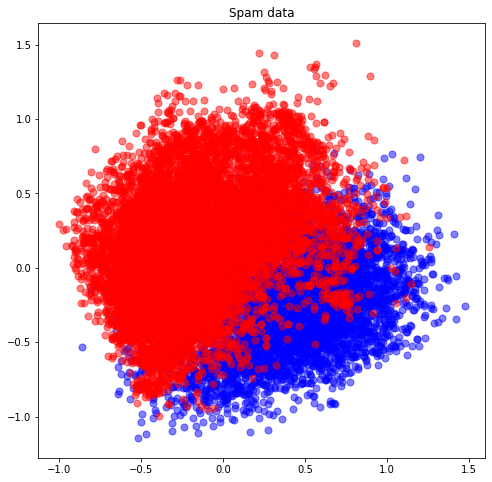

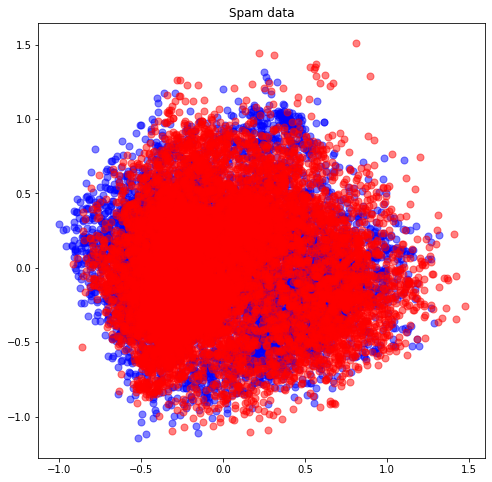

Build random forest classifier...
Build adaboost classifier...
Build gbm classifier...
Build svm classifier...
Random Forest :
             precision    recall  f1-score   support

        0.0    0.59804   0.60010   0.59907      2033
        1.0    0.89858   0.89779   0.89819      8023

avg / total    0.83782   0.83761   0.83771     10056
final score    0.74831   0.74895   0.74863     10056

AdaBoost :
             precision    recall  f1-score   support

        0.0    0.92398   0.42450   0.58173      2033
        1.0    0.87174   0.99115   0.92762      8023

avg / total    0.88230   0.87659   0.85769     10056
final score    0.89786   0.70782   0.75467     10056

Gradient Boosting Machine :
             precision    recall  f1-score   support

        0.0    0.67580   0.84899   0.75256      2033
        1.0    0.95908   0.89680   0.92689      8023

avg / total    0.90181   0.88713   0.89165     10056
final score    0.81744   0.87289   0.83973     10056

SVM :
             precision  

In [3]:
features_percent = 0.9
trees = 5

train_data = np.loadtxt('spam.train.txt')
test_data  = np.loadtxt('spam.test.txt')

total_data = np.concatenate(([train_data, test_data]), axis=0)

# Visualizations of data
visualize_classes(total_data[0::, 1::], total_data[0::, 0])
visualize_data(total_data[0::, 1::], len(train_data[:,0]), len(test_data[:,0]))

number_of_features = len(train_data[0, :]) - 1

use_features_in_tree = (int)(features_percent * number_of_features)

# Create the random forest classifier
print("Build random forest classifier...")
forest = RandomForestClassifier(n_estimators = trees, max_features=use_features_in_tree)
forest = forest.fit(train_data[0::, 1::], train_data[0::, 0])
prediction_randomforest = forest.predict(test_data[0::, 1::])

#Create adaboost classifier
print("Build adaboost classifier...")
adaboost_classifier = AdaBoostClassifier(n_estimators=trees)
adaboost_classifier.fit(train_data[0::, 1::], train_data[0::, 0])
prediction_adaboost = adaboost_classifier.predict(test_data[0::, 1::])

#Create gbm classifier
print("Build gbm classifier...")
gbm_classifier = GradientBoostingClassifier(n_estimators=trees)
gbm_classifier.fit(train_data[0::, 1::], train_data[0::, 0])
prediction_gbm = gbm_classifier.predict(test_data[0::, 1::])

#Create svm classifier
print("Build svm classifier...")
svm_classifier = svm.SVC()
svm_classifier.fit(train_data[0::, 1::], train_data[0::, 0])
prediction_svm = svm_classifier.predict(test_data[0::, 1::])

print(classification_report(test_data[0::, 0], prediction_randomforest, 'Random Forest'))
print(classification_report(test_data[0::, 0], prediction_adaboost, 'AdaBoost'))
print(classification_report(test_data[0::, 0], prediction_gbm, 'Gradient Boosting Machine'))
print(classification_report(test_data[0::, 0], prediction_svm, 'SVM'))

In [4]:
svm_classifier = svm.SVC()
svm_classifier.fit(train_data[0::, 1::], train_data[0::, 0])
prediction_svm = svm_classifier.predict(test_data[0::, 1::])

print(f"SVM f_micro = {sklearn.metrics.f1_score(test_data[:,0], prediction_svm, average='micro')}")

SVM f_micro = 0.9360580747812252


In [5]:
logreg = sklearn.linear_model.LogisticRegression()

scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(train_data[0::, 1::])

logreg.fit(scaler.transform(train_data[0::, 1::]), train_data[0::, 0])
prediction_logreg = logreg.predict(scaler.transform(test_data[0::, 1::]))

print(f"LogReg f_micro = {sklearn.metrics.f1_score(test_data[:,0], prediction_logreg, average='micro')}")

LogReg f_micro = 0.90324184566428


In [6]:
import torch
import torch.nn as nn
from tqdm.notebook import tqdm


perceptron = nn.Sequential(nn.Linear(number_of_features,128),   
                           nn.ReLU(),
                           nn.Linear(128,2),
                           nn.LogSoftmax(dim=1)
                          )
Loss = nn.NLLLoss()
optimizer = torch.optim.Adam(perceptron.parameters())

dataloader = torch.utils.data.DataLoader(train_data,1024,True)

num_epoch=15
losses = []
for i in tqdm(range(num_epoch)):
    for data in dataloader:
        optimizer.zero_grad()
        
        pred = perceptron(data[:,1:].float())
        loss = Loss(pred,data[:,0].long())
        losses.append(loss.item())
        
        loss.backward()
        optimizer.step()
    
pred = perceptron(torch.from_numpy(test_data[:,1:]).float()).max(axis=1).indices
print(f"Perceptron f_micro = {sklearn.metrics.f1_score(test_data[:,0], pred, average='micro')}")


Perceptron f_micro = 0.9347653142402544


***Лучший результат ~0.936***

In [7]:
def grid_search(Model,params,train_data,test_data):
    def f(d,keys):
        if len(keys)==1:
            yield from [[(keys[0],x)] for x in d[keys[0]]]
        else:
            for l in f(d,keys[1:]):
                l.append(None)
                for x in d[keys[0]]:
                    l[-1] = (keys[0],x)
                    yield l
    gen = f(params,[*params.keys()])
    
    best_f = 0
    for dic in gen:
        dic = dict(dic)
        model = Model(**dic)
        model = model.fit(train_data[0::, 1::], train_data[0::, 0])
        pred = model.predict(test_data[0::, 1::])
        
        f_score = sklearn.metrics.f1_score(test_data[:,0], pred, average='micro')
        if f_score>best_f:
            best_f = f_score
            best_params = dic
    return best_f,best_params

In [8]:
print('RF f_micro')
grid_search(RandomForestClassifier,{'n_estimators':[5,10,50,100,200],
                                    'max_features':[(int)(x * number_of_features)
                                                    for x in [0.6,0.5,0.4,0.3] ]},train_data,test_data)

RF f_micro


(0.9461018297533811, {'max_features': 40, 'n_estimators': 200})

In [9]:
print('AdaBoost f_micro')

grid_search(AdaBoostClassifier,{'n_estimators':[100,150,200,250,300]},train_data,test_data)

AdaBoost f_micro


(0.9353619729514717, {'n_estimators': 150})

In [10]:
print('GradientBoosting f_micro')

grid_search(GradientBoostingClassifier,{'n_estimators':[100,200,300,500]},train_data,test_data)

GradientBoosting f_micro


(0.9610182975338106, {'n_estimators': 300})

***AdaBoost достиг соизмеримого результата, RF и GradientBoosting легко превзошли все прошлые модели***